# Recommendation Engines: Implementing Surprise
- Surprise is a scikit library that stands for **Simple Python RecommendatIon System Engine**
- Has built-in similarity metrics, baseline methods, content-based systems, matrix factorization systems

In this notebook, we'll first walk through setting up a super basic recommendation system, using the popular MovieLens 100K Dataset. Then, we'll look into more detail how Surprise works.

## Fitting and Predicting with Surprise

### 1. Install surprise if you haven't, and import the usual libraries.

In [1]:
# import libraries
import numpy as np
import pandas as pd

from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

### 2. Load in the dataset

Surprise has the dataset built in. You might need to download the dataset so follow the instructions in the code output! Unfortunately, the Surprise data format doesn't let us inspect the data, but here is the documentation: https://grouplens.org/datasets/movielens/100k/


In [2]:
data = Dataset.load_builtin('ml-100k')

# train-test split
train, test = train_test_split(data, test_size=.2)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\dlm66/.surprise_data/ml-100k


### 3. Run the default Singular Value Decomposition Model!

In [6]:
svd = SVD()
svd.fit(train)
predictions = svd.test(test)

In [7]:
accuracy.rmse(predictions)

RMSE: 0.9433


0.9432655050073416

### 4. Make a prediction!

In [10]:
uid = str(196)  # raw user id (as in the ratings file). They are **strings**!
iid = str(302)

# get a prediction for specific users and items.
pred = svd.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 4.11   {'was_impossible': False}


## Applying Surprise

### 1. How does Surprise take in your data?
https://surprise.readthedocs.io/en/stable/getting_started.html#use-a-custom-dataset

The dataset we'll use is a subset of the Yelp Open Dataset that's already been joined and cleaned.
https://www.yelp.com/dataset

In [11]:
yelp = pd.read_csv('yelp_reviews.csv').drop(['Unnamed: 0'], axis = 1)

In [12]:
yelp.head()

,user_id,business_id,stars
0,brd33PD_6nqK_VVnO3NWAg,--1UhMGODdWsrMastO9DZw,4.0
1,NqpKiaRsGfuU2voV5dPRCQ,--1UhMGODdWsrMastO9DZw,1.0
2,dhzlnpisqA7V1zfiO12AZA,--1UhMGODdWsrMastO9DZw,2.0
3,A4bpHuvzaQt9-XAg8e9Msw,--1UhMGODdWsrMastO9DZw,3.0
4,GL81ktDIteXA2VVH6gIakg,--1UhMGODdWsrMastO9DZw,5.0


### 2. Inspecting the dataset:

Here's where you'd do a **comprehensive** EDA!

In [14]:
print('Number of Users: ', yelp['user_id'].nunique())
print('Number of Businesses: ', len(yelp['business_id'].unique()))

Number of Users:  79773
Number of Businesses:  2518


1. What's the distribution of ratings? i.e. How many 1-star, 2-star, 3-star reviews?
2. How many reviews does a restaurant have?
3. How many reviews does a user make?

In [15]:
yelp.stars.value_counts()

5.0    42685
4.0    23143
1.0    14315
3.0    11522
2.0     8335
Name: stars, dtype: int64

In [16]:
yelp.business_id.value_counts()

-ed0Yc9on37RoIoG2ZgxBA    1694
--9e1ONYQuAa-CB_Rrw7Tw    1661
-6tvduBzjLI1ISfs3F_qTg    1194
-U7tvCtaraTQ9b0zBhpBMA    1180
-FLnsWAa4AGEW4NgE8Fqew    1128
-Eu04UHRqmGGyvYRDY8-tg     940
-av1lZI1JDY_RZN2eTMnWg     903
-kG0N8sBhBotMbu0KVSPaw     882
-WLrZPzjKfrftLWaCi1QZQ     866
-Ht7HiGBox8lS1Y8IPjO8g     865
-IWsoxH7mLJTTpU5MmWY4w     853
-ZBfr1BHvArFp1d6XH8jOQ     808
-oUM2uISux96lMGeawHIOA     795
-kIscN8I29eXMPkvyyxmRQ     793
-95mbLJsa0CxXhpaNL4LvA     736
-050d_XIor1NpCuWkbIVaQ     725
-bd4BQcl1ekgo7avaFngIw     679
-Ylpy3VyRWwubf9dysuwjQ     677
-FtngCwHCD2tRlH8jpj_Ag     664
-3zffZUHoY8bQjGfPSoBKQ     653
-9dmhyBvepc08KPEHlEM0w     638
-Bdw-5H5C4AYSMGnAvmnzw     638
-fiUXzkxRfbHY9TKWwuptw     623
-o082vExIs0VVNSuZmiTQA     577
-bMZCfTK7fxFaURynKpBMA     572
-6h3K1hj0d4DRcZNUtHDuw     552
-7H-oXvCxJzuT42ky6Db0g     550
-a857YYdjzgOdOjFFRsRXQ     549
-Dnh48f029YNugtMKkkI-Q     541
-C8S2OPEOI1fL-2Q41tWVA     515
                          ... 
-UxecpcfbpaVgI46fS2KkA       3
-3VEk6j5

In [17]:
yelp.user_id.value_counts()

CxDOIDnH8gp9KXzpBHJYXw    50
U4INQZOPSUaj8hMjLlZ3KA    33
bLbSNkLggFnqwNNzzq-Ijw    31
DK57YibC5ShBmqQl97CKog    27
QJI9OSEn6ujRCtrX06vs1w    27
PKEzKWv_FktMm2mGPjwd0Q    24
M9rRM6Eo5YbKLKMG5QiIPA    24
j6wLUT0ZXi-x0otelYIFpA    23
rCWrxuRC8_pfagpchtHp6A    22
iDlkZO2iILS8Jwfdy7DP9A    22
dIIKEfOgo0KqUfGQvGikPg    22
JnPIjvC0cmooNDfsa9BmXg    21
24AzZDQKHySwMQR7VQVCAg    21
U5YQX_vMl_xQy8EQDqlNQQ    21
d_TBs6J3twMy9GChqUEXkg    21
MMf0LhEk5tGa1LvN7zcDnA    20
N3oNEwh0qgPqPP3Em6wJXw    20
UYcmGbelzRa0Q6JqzLoguw    20
n86B7IkbU20AkxlFX_5aew    20
cMEtAiW60I5wE_vLfTxoJQ    20
pMefTWo6gMdx8WhYSA2u3w    20
orh0HRUNCWuQMt9Iia_osg    19
TbhyP24zYZqZ2VJZgu1wrg    18
YRcaNlwQ6XXPFDXWtuMGdA    18
hWDybu_KvYLSdEFzGrniTw    18
Ry1O_KXZHGRI8g5zBR3IcQ    18
V-BbqKqO8anwplGRx9Q5aQ    17
ic-tyi1jElL_umxZVh8KNA    17
sTcYq6goD1Fa2WS9MSkSvQ    17
ELcQDlf69kb-ihJfxZyL0A    17
                          ..
OfLGtBmgSZ7OQJhSbyBB1w     1
I-tI5T5TdKEDTGYqChe3eA     1
hgHuaQYsQH400lRoHJpJ0Q     1
xhy-g_FZbvcZG7

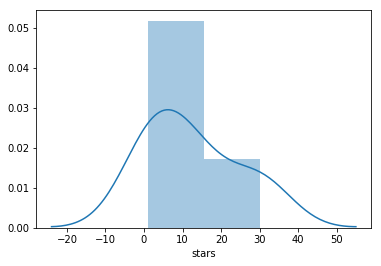

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
x = yelp[yelp.user_id == 'CxDOIDnH8gp9KXzpBHJYXw'].stars.value_counts()
sns.distplot(x)

### 3. Reading in the dataset and prepping data

In [23]:
# Instantiate a 'Reader' to read in the data so Surprise can use it
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(yelp[['user_id', 'business_id', 'stars']], reader)

In [24]:
trainset, testset = train_test_split(data, test_size=.2)

### 4. Fitting and evaluating models
Here, let's assume that we've tuned all these hyperparameters using GridSearch, and we've arrived at our final model.

In [25]:
final = SVD(n_epochs=20, n_factors=1, biased=True, 
              lr_all=0.005, reg_all=0.06)

In [26]:
final.fit(trainset)

In [27]:
predictions = final.test(testset)

In [28]:
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 1.2991
MAE:  1.0559


1.0558587932341983

### 5. Making Predictions (again)
Unfortunately, this dataset has a convoluted string as the user/business IDs.

In [29]:
yelp['user_id'][55]

'HPtjvIrhzAUkKsiVkeT4MA'

In [30]:
yelp['business_id'][123]

'--7zmmkVg-IMGaXbuVd0SQ'

In [31]:
final.predict(yelp['user_id'][55], yelp['business_id'][13])

Prediction(uid='HPtjvIrhzAUkKsiVkeT4MA', iid='--1UhMGODdWsrMastO9DZw', r_ui=None, est=3.7754419140246167, details={'was_impossible': False})

### 6. What else?

Surprise has sample code where you can get the top **n** recommended items for a user. https://surprise.readthedocs.io/en/stable/FAQ.html

# Resources
- The structure of our lesson on recommendation engines is based on Chapter 9 of **Mining of Massive Datasets**: http://infolab.stanford.edu/~ullman/mmds/book.pdf
- Libraries for coding recommendation engines: 
    - Surprise: https://surprise.readthedocs.io/en/stable/index.html
    - LightFM: https://lyst.github.io/lightfm/docs/index.html